<center>

![](https://drive.google.com/uc?export=view&id=1R6EAVE0Ysym-UNtZR-Ze_HcqQLDmH0bd) 
<p> 
College: Engineering and Information Technology <br>
Department: Information Technology <br>
Program: Data Analytics <br>
Academic semester: Fall 2022- 2023 <br>
Data Engineering Lab DAT204 <br>
Dr Ghazi Al Naymat <br>
Eng. Abdulrahman Al Muaitah <br>
</p></center>
Working with Databases 
</p></center>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Creating a Database in Python using SQLite3 

For the first task we will perform the following: 
1. Create a database and tables using SQLite3 
2. Insert values into the tables 
3. Display the results into a Dataframe 

In [8]:
import sqlite3 
import pandas as pd 

connection = sqlite3.connect('test_database') 

In [9]:
#Establishing the connection 
c = connection.cursor() 

In this step, you’ll see how to create:

*   A new database called: test_database

*   2 tables called: products, and prices

Here are the columns to be added for the 2 tables:
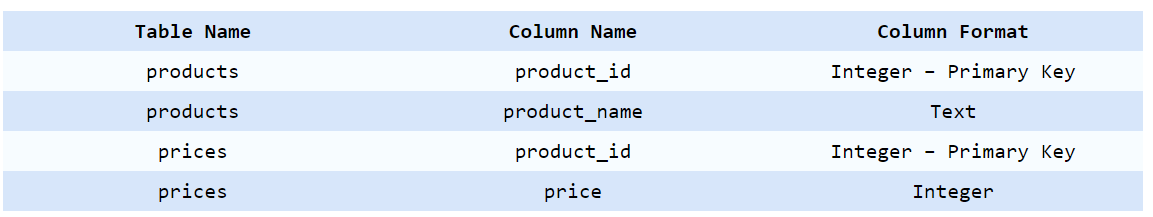

In [10]:
#Creating the two tables (products) and (prices)
c.execute('''
          CREATE TABLE IF NOT EXISTS products
          ([product_id] INTEGER PRIMARY KEY, [product_name] TEXT)
          ''')
          
c.execute('''
          CREATE TABLE IF NOT EXISTS prices
          ([product_id] INTEGER PRIMARY KEY, [price] INTEGER)
          ''')
                     
connection.commit()

In [11]:
#Getting a list of all the tables 
c.execute('''
            SELECT name FROM sqlite_master
            WHERE type='table';
            ''')
print("List of tables\n")
     
# printing all tables list
print(c.fetchall())

List of tables

[('products',), ('prices',)]


For this step, let’s insert the following data into the ‘products‘ table:

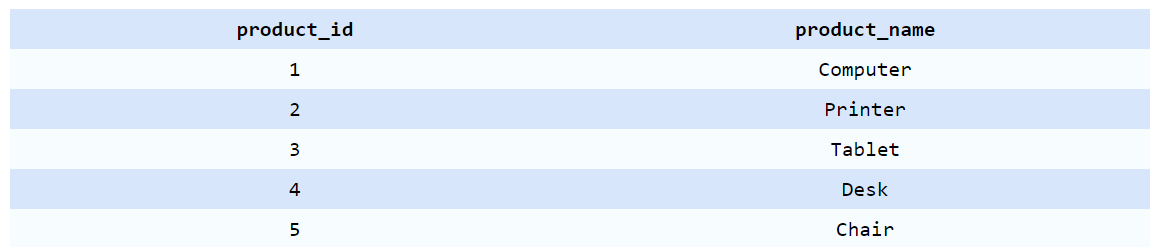

In [12]:
#Inserting values into the 2 tables 
c.execute('''
          INSERT INTO products (product_id, product_name)

                VALUES
                (1,'Computer'),
                (2,'Printer'),
                (3,'Tablet'),
                (4,'Desk'),
                (5,'Chair')
          ''')

c.execute('''
          INSERT INTO prices (product_id, price)

                VALUES
                (1,800),
                (2,200),
                (3,300),
                (4,450),
                (5,150)
          ''')

connection.commit()

# Step 3: Display the results
For the final step, let’s join the ‘products‘ table with the ‘prices‘ table using the product_id column which is present in both tables.

You can then run the following code to display the results in Pandas DataFrame:

In [13]:
#Selecting all the columns from the products table
df1 = pd.read_sql_query('select * from products',connection) 
df1 

,product_id,product_name
0,1,Computer
1,2,Printer
2,3,Tablet
3,4,Desk
4,5,Chair


In [15]:
#Selecting the column "product_name" from the products table
df2 = pd.read_sql_query('select product_name from products',connection) 
df2

,product_name
0,Computer
1,Printer
2,Tablet
3,Desk
4,Chair


In [16]:
#Selecting all the columns from the products table, ordered ascendingly by the product_name column
df3 = pd.read_sql_query('select * from products order by product_name',connection) 
df3

,product_id,product_name
0,5,Chair
1,1,Computer
2,4,Desk
3,2,Printer
4,3,Tablet


In [17]:
#Selecting all the columns from the products table, ordered descendingly by the product_name column
df4 = pd.read_sql_query('select * from products order by product_name desc',connection) 
df4

,product_id,product_name
0,3,Tablet
1,2,Printer
2,4,Desk
3,1,Computer
4,5,Chair


In [26]:
#Counting all the rows in the products table 
df5 = pd.read_sql_query('select count(*) from products',connection) 
df5

,count(*)
0,5


In [27]:
#Selecting the product name with the maximum price 
df6 = pd.read_sql_query('''select a.product_name, max(b.price)
                           from products a, prices b
                           where a.product_id = b.product_id''',connection )
df6

,product_name,max(b.price)
0,Computer,800


In [29]:
#Merging/joining the products and prices tables 
df7 = pd.read_sql_query('''select a.product_name, b.price
                           from products a, prices b
                           where a.product_id = b.product_id''',connection )
df7

,product_name,price
0,Computer,800
1,Printer,200
2,Tablet,300
3,Desk,450
4,Chair,150


## Task 2: Reading/Querying a Database in Python using SQLite3 and Pandas

### Connect to the DB

In [30]:
import sqlite3
conn = sqlite3.connect('/content/customer_sales.db')

## Send SQL query to the DB 

- `custers_sales` DB has three tables :

>```tbl_customers```

>`tbl_sales`

>```tbl_products```

## Reading all tables as Pandas DataFrame 

In [31]:
import pandas as pd
Q_tbl_customers ="SELECT * FROM tbl_customers;"  # Define query for tbl_customers
Q_tbl_sales ="SELECT * FROM tbl_sales;"          # Define query for tbl_sales
Q_tbl_products ="SELECT * FROM tbl_products;"    # Define query for tbl_prodcuts 

tbl_customers_DF =pd.read_sql_query(Q_tbl_customers, conn) # Get tbl_customers as Pandas DataFrame 
tbl_sales_DF =pd.read_sql_query(Q_tbl_sales, conn)  # Get tbl_sales as Pandas DataFrame 
tbl_products_DF =pd.read_sql_query(Q_tbl_products, conn) # Get tbl_products as Pandas DataFrame 


In [32]:
tbl_customers_DF

,Customer_ID,First_Name,Last_Name,Address_Line_1,Address_Line_2,City,State,ZipCode,Phone,Email
0,1,Johnny,Smith,123 Main Street,None,Miami,FL,12345,302-555-1212,jsmith@email.com
1,2,Debbie,Winner,31 Roundtree Lane,None,Dover,NJ,18888,None,debbie_winner@email.com
2,3,Seth,Winer,310 Roundtree Lane,None,Dover,NJ,18888,None,sw@email.com
3,4,Anthony,Leedessa,Dallas Drive,Unit 806,El Paso,TX,99928,None,alligator@email.com
4,5,Pete,Einstein,Morton Street,None,Philadelphia,PA,28373,215-555-1212,peter_einstein@email.com


In [33]:
tbl_customers_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     5 non-null      int64 
 1   First_Name      5 non-null      object
 2   Last_Name       5 non-null      object
 3   Address_Line_1  5 non-null      object
 4   Address_Line_2  1 non-null      object
 5   City            5 non-null      object
 6   State           5 non-null      object
 7   ZipCode         5 non-null      object
 8   Phone           2 non-null      object
 9   Email           5 non-null      object
dtypes: int64(1), object(9)
memory usage: 528.0+ bytes


In [34]:
tbl_customers_DF.shape

(5, 10)

In [35]:
tbl_sales_DF

,Sale_ID,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
0,1,12/31/2014,Purchased from Store,2,2,20,1
1,2,1/15/2015,Phone Purchase,1,1,30,2
2,3,6/14/2015,Internet Purchase,3,3,5,1
3,4,11/11/2015,Sales Convention Purchase,3,3,500,100
4,5,4/18/2016,Internet Purchase,4,1,20,2
5,6,10/15/2016,Purchased from Store,5,1,20,1
6,7,3/17/2017,Internet Purchase,4,1,20,1
7,8,6/15/2018,Purchased from Store,3,3,5,1
8,9,5/25/2019,Internet Purchase,1,3,10,2
9,10,6/9/2019,Internet Purchase,2,3,10,2


In [36]:
tbl_products_DF

,Product_ID,Product_Name,Description,Active,Introduction_Date,Expire_Date
0,1,Fun Hoodie,The Fun Hoodie is a fun fashion accessory to h...,1,3/31/2004,None
1,2,Spanky Pants,"A must for active people on the go, Spanky Pan...",0,6/1/1998,12/31/2015
2,3,Shoe Shine,Shoe Shine is our best product yet!,1,8/19/2000,None


### Name one of the columns as an index for the DataFrame 

In [37]:
df_sales = pd.read_sql_query("SELECT * FROM tbl_sales;", conn, index_col="Sale_ID")
df_sales

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
1,12/31/2014,Purchased from Store,2,2,20,1
2,1/15/2015,Phone Purchase,1,1,30,2
3,6/14/2015,Internet Purchase,3,3,5,1
4,11/11/2015,Sales Convention Purchase,3,3,500,100
5,4/18/2016,Internet Purchase,4,1,20,2
6,10/15/2016,Purchased from Store,5,1,20,1
7,3/17/2017,Internet Purchase,4,1,20,1
8,6/15/2018,Purchased from Store,3,3,5,1
9,5/25/2019,Internet Purchase,1,3,10,2


In [38]:
df_sales.head(3)

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
1,12/31/2014,Purchased from Store,2,2,20,1
2,1/15/2015,Phone Purchase,1,1,30,2
3,6/14/2015,Internet Purchase,3,3,5,1


In [39]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sale_Date       10 non-null     object
 1   Description     10 non-null     object
 2   Customer_ID     10 non-null     int64 
 3   Product_ID      10 non-null     int64 
 4   Sales_Amount    10 non-null     int64 
 5   Sales_Quantity  10 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 560.0+ bytes


In [40]:
df_sales.sort_values(by='Sale_ID')

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
1,12/31/2014,Purchased from Store,2,2,20,1
2,1/15/2015,Phone Purchase,1,1,30,2
3,6/14/2015,Internet Purchase,3,3,5,1
4,11/11/2015,Sales Convention Purchase,3,3,500,100
5,4/18/2016,Internet Purchase,4,1,20,2
6,10/15/2016,Purchased from Store,5,1,20,1
7,3/17/2017,Internet Purchase,4,1,20,1
8,6/15/2018,Purchased from Store,3,3,5,1
9,5/25/2019,Internet Purchase,1,3,10,2


In [41]:
df_sales

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
1,12/31/2014,Purchased from Store,2,2,20,1
2,1/15/2015,Phone Purchase,1,1,30,2
3,6/14/2015,Internet Purchase,3,3,5,1
4,11/11/2015,Sales Convention Purchase,3,3,500,100
5,4/18/2016,Internet Purchase,4,1,20,2
6,10/15/2016,Purchased from Store,5,1,20,1
7,3/17/2017,Internet Purchase,4,1,20,1
8,6/15/2018,Purchased from Store,3,3,5,1
9,5/25/2019,Internet Purchase,1,3,10,2


In [43]:
Cond=(df_sales['Description']=='Purchased from Store') & (df_sales['Customer_ID']==2)

df_sales[Cond]

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
1,12/31/2014,Purchased from Store,2,2,20,1


In [46]:
Cond=(df_sales['Product_ID']==3) | (df_sales['Product_ID'] ==2)

df_sales[Cond][['Description','Sale_Date']]

,Description,Sale_Date
Sale_ID,,
1,Purchased from Store,12/31/2014
3,Internet Purchase,6/14/2015
4,Sales Convention Purchase,11/11/2015
8,Purchased from Store,6/15/2018
9,Internet Purchase,5/25/2019
10,Internet Purchase,6/9/2019


In [47]:
df_sales[df_sales['Product_ID']==3]

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
3,6/14/2015,Internet Purchase,3,3,5,1
4,11/11/2015,Sales Convention Purchase,3,3,500,100
8,6/15/2018,Purchased from Store,3,3,5,1
9,5/25/2019,Internet Purchase,1,3,10,2
10,6/9/2019,Internet Purchase,2,3,10,2


In [48]:
df_sales.loc[:3,'Sale_Date']

Sale_ID
1    12/31/2014
2     1/15/2015
3     6/14/2015
Name: Sale_Date, dtype: object

In [49]:
df_sales['Sale_Date']

Sale_ID
1     12/31/2014
2      1/15/2015
3      6/14/2015
4     11/11/2015
5      4/18/2016
6     10/15/2016
7      3/17/2017
8      6/15/2018
9      5/25/2019
10      6/9/2019
Name: Sale_Date, dtype: object

In [50]:
df_sales['Sale_Date']

Sale_ID
1     12/31/2014
2      1/15/2015
3      6/14/2015
4     11/11/2015
5      4/18/2016
6     10/15/2016
7      3/17/2017
8      6/15/2018
9      5/25/2019
10      6/9/2019
Name: Sale_Date, dtype: object

In [51]:
results = df_sales['Sales_Amount'] > 100
results

Sale_ID
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
Name: Sales_Amount, dtype: bool

In [52]:
df_sales[(df_sales['Sales_Amount'] > 100)]

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
4,11/11/2015,Sales Convention Purchase,3,3,500,100


In [53]:
df_sales[(df_sales['Sales_Quantity'] == 2)]

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
2,1/15/2015,Phone Purchase,1,1,30,2
5,4/18/2016,Internet Purchase,4,1,20,2
9,5/25/2019,Internet Purchase,1,3,10,2
10,6/9/2019,Internet Purchase,2,3,10,2


In [54]:
Q="SELECT * FROM tbl_products;"
df_products = pd.read_sql_query(Q, conn)

In [55]:
df_products

,Product_ID,Product_Name,Description,Active,Introduction_Date,Expire_Date
0,1,Fun Hoodie,The Fun Hoodie is a fun fashion accessory to h...,1,3/31/2004,None
1,2,Spanky Pants,"A must for active people on the go, Spanky Pan...",0,6/1/1998,12/31/2015
2,3,Shoe Shine,Shoe Shine is our best product yet!,1,8/19/2000,None


In [58]:
#Using Python
df_products['Product_Name'].nunique()

3

In [68]:
#Using an SQL query
Q="SELECT COUNT(DISTINCT Product_Name) FROM tbl_products;"
pd.read_sql_query(Q, conn).iloc[0][0]

3

In [60]:
df_products['Product_Name'].nunique()

3

In [61]:
#Appending values to a list using a for loop 
result=[]
for i in range(10):
  y=i**2
  result.append(y)



In [62]:
#Appending values to a list using a list comprehension
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [63]:
df_products['Product_Name']=[prod.lower() for prod in df_products['Product_Name']]

In [64]:
df_products

,Product_ID,Product_Name,Description,Active,Introduction_Date,Expire_Date
0,1,fun hoodie,The Fun Hoodie is a fun fashion accessory to h...,1,3/31/2004,None
1,2,spanky pants,"A must for active people on the go, Spanky Pan...",0,6/1/1998,12/31/2015
2,3,shoe shine,Shoe Shine is our best product yet!,1,8/19/2000,None


In [65]:
#writing a conditional query in SQL 
Q_Cond_sales ="SELECT * FROM tbl_sales WHERE Sales_Amount>=20 ;" 

salesCondDF =pd.read_sql_query(Q_Cond_sales, conn) 

salesCondDF 

,Sale_ID,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
0,1,12/31/2014,Purchased from Store,2,2,20,1
1,2,1/15/2015,Phone Purchase,1,1,30,2
2,4,11/11/2015,Sales Convention Purchase,3,3,500,100
3,5,4/18/2016,Internet Purchase,4,1,20,2
4,6,10/15/2016,Purchased from Store,5,1,20,1
5,7,3/17/2017,Internet Purchase,4,1,20,1


In [66]:
#anotherway to select data from a table
indexList = df_sales['Sales_Amount']>=20

df_sales[indexList]

,Sale_Date,Description,Customer_ID,Product_ID,Sales_Amount,Sales_Quantity
Sale_ID,,,,,,
1,12/31/2014,Purchased from Store,2,2,20,1
2,1/15/2015,Phone Purchase,1,1,30,2
4,11/11/2015,Sales Convention Purchase,3,3,500,100
5,4/18/2016,Internet Purchase,4,1,20,2
6,10/15/2016,Purchased from Store,5,1,20,1
7,3/17/2017,Internet Purchase,4,1,20,1


## **QUESTIONS**

-----------------
#### **Question 1**
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: write query to get ```tbl_products``` table from ```customer_sales.db``` Database as pandas DataFrame and call it ```DF```


-----------------
#### **Question 2**
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: print the list of columns names in ```DF```.


-----------------
#### **Question 3**
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: print the number of unique values in the `Active` column in ```DF```.


-----------------
#### **Question 4**
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: print the number of unique values in the `Active` column in `tbl_products` table using SQL query on `customer_sales.db` Database.


-----------------
#### **Question 5**
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: print the number of missing values in the `Expire_Date` column in `DF`.


## **HOMEWORK QUESTIONS**

-----------------
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: write a function that you pass to it `df_sales` DataFrame and it returns a tuple of `max`,`min`,`mean` and `median` of `Sales_Quantity` column.


-----------------
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on**: write script to add column that provide product description to `df_sales` table. Hint: Use `Product_ID` column from `tbl_products` table to get `Description`. 

See [StackOverflow](https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column)


-----------------
<p><img alt="Colaboratory logo" height="60px" src="/img/colab_favicon.ico" align="left" hspace="20px" vspace="0px"></p>

**Hands-on**: write query to get `tbl_sales` and parse the `Sale_Date` column as datetime64 type. Then, validate the type using `.info()` method. Then use new df_sales dataframe and sort the rows based on `Sale_Date`.**Hint**: `parse_dates='Sale_Date'` as a parameter in `.read_sql_query()` method. 
